# 作業: 
3  層神經網路

通過增加更多的中間層，以對更多關係的組合進行建模

syn1 權值矩陣將隱層的組合輸出映射到最終結果，

而在更新 syn1 的同時，還需要更新 syn0 權值矩陣，

以從輸入資料中更好地產生這些組合

# BP 演算法訓練的神經網路


目標: 嘗試著用輸入去預測輸出
 
考慮以上情形：
給定三列輸入，試著去預測對應的一列輸出。

我們可以通過簡單測量輸入與輸出值的資料來解決這一問題。

最左邊的一列輸入值和輸出值是完美匹配/完全相關的。

反向傳播演算法便是通過這種方式來衡量資料間統計關係進而得到模型的。


# 更新3 Layers 所需參數定義

X 輸入資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

y 輸出資料集，形式為矩陣，每 1 行代表 1 個訓練樣本。

l0 網路第 1 層，即網路輸入層。

l1 網路第 2 層，常稱作隱藏層。

l2 假定為網路最後一層，隨著訓練進行，其輸出應該逐漸接近正確結果

syn0 第一層權值

syn1 第二層權值

l2_error 該值說明了神經網路預測時“丟失”的數目。

l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。

l1_error 該值為 l2_delta 經 syn1 加權後的結果，從而能夠計算得到中間層/隱層的誤差。

l1_delta 該值為經確信度加權後的神經網路 l1 層的誤差，除了確信誤差很小時，它近似等於 l1_error 。

In [1]:
import numpy as np
 
# Sigmoid 函數可以將任何值都映射到一個位於 0 到  1 範圍內的值。通過它，我們可以將實數轉化為概率值
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))

X = np.array([  [0,0,1],
                [0,1,1],
                [1,0,1],
                [1,1,1] ])  
        
# define y for output dataset            
y = np.array([[1], [0], [0], [1]])

In [2]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)
lr = 0.01
epochs = 1000
l1_neural_num = 4

# Initialize weights randomly with mean 0
syn0 = 2*np.random.random((X.shape[1], l1_neural_num)) - 1
syn1 = 2*np.random.random(size=(l1_neural_num, y.shape[1]))

神經網路訓練
for 迴圈反覆運算式地多次執行訓練代碼，使得我們的網路能更好地擬合訓練集

In [3]:
error_history = np.zeros(shape=(epochs))
for iters in range(epochs):
    # forward propagation
    l1_input = X.dot(syn0)
    l1_output = nonlin(l1_input)
    
    outputlayer_input = l1_output.dot(syn1)
    output_val = nonlin(outputlayer_input)
    '''
    新增
    l2_error 該值說明了神經網路預測時“丟失”的數目。
    l2_delta 該值為經確信度加權後的神經網路的誤差，除了確信誤差很小時，它近似等於預測誤差。
    '''
    
    # Backward pass
    loss = y - output_val # Define loss function = 1/2(summation(yi - y_hat)^2)
    error = 1/2*(np.sum(y - output_val)**2)
    error_history[iters] = error
    
    output_dloss_dz = loss * nonlin(output_val, deriv=True) # dy/dz * dL/dy (output layer)
    l1_dactivate_dz = loss * nonlin(l1_output, deriv=True)  # dy/dz * dL/dy (hidden layer)
    
    dloss_dactivate = syn1.T.dot(output_dloss_dz) # Calculate total dloss/d(act(z)) (from output layer to hiden)
    dloss_dz = dloss_dactivate * l1_dactivate_dz # d(act(z))/dz * dloss/d(act(z))
    
    # Update wight
    syn0 -= lr * X.T.dot(dloss_dz) # dz/dw * dloss/dz
    syn1 -= lr * l1_output.T.dot(output_dloss_dz) # dz/dw * dloss/dz
        

In [4]:
import matplotlib.pyplot as plt

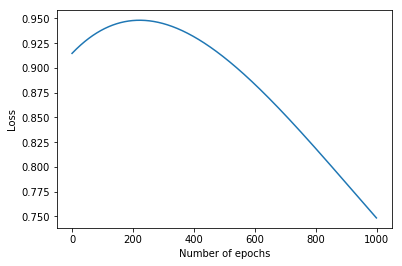

In [5]:
plt.plot(range(epochs), error_history)
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()